In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('./cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [35]:
df.isnull().values.any()

False

In [36]:
from sklearn.model_selection import train_test_split
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=11)

In [37]:
print(np.around(len(x_train)/len(df)*100 , 2), '% data is in training set')
print(np.around(len(x_test)/len(df)*100 , 2), '% data is in testing set')

69.95 % data is in training set
30.05 % data is in testing set


In [38]:
x_train.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
430,14.90,22.53,102.10,685.0,0.09947
324,12.20,15.21,78.01,457.9,0.08673
98,11.60,12.84,74.34,412.6,0.08983
502,12.54,16.32,81.25,476.3,0.11580
92,13.27,14.76,84.74,551.7,0.07355


In [39]:
cols = x_train.columns

In [40]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [41]:
y_pred_train = model.predict(x_train)

In [42]:
from sklearn import metrics
print('Model accuracy: ' , np.around(metrics.accuracy_score(y_train,y_pred_train) * 100,2), '%')

Model accuracy:  91.46 %


In [43]:
y_pred_test = model.predict(x_test)

print('Model Accuracy: ' ,np.around(metrics.accuracy_score(y_test,y_pred_test) * 100,2) ,'%')

Model Accuracy:  85.96 %


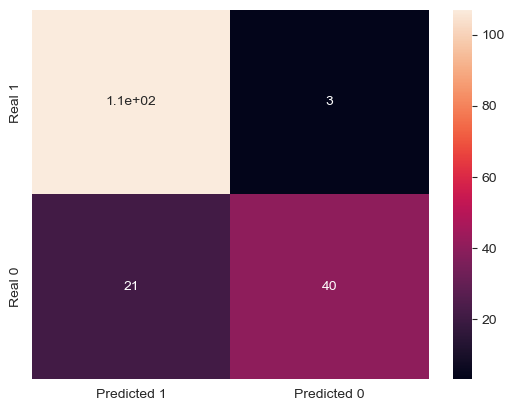

In [44]:
confusion = metrics.confusion_matrix(y_test,
                                     y_pred_test,
                                     labels=[1 , 0])
confusion_df = pd.DataFrame(confusion,
                            index=['Real 1','Real 0'],
                            columns = ['Predicted 1','Predicted 0'])

sns.heatmap(confusion_df, annot= True)
plt.show()


In [45]:
evaluation = metrics.classification_report(y_test,
                                           y_pred_test,
                                           labels=[1, 0])
print(evaluation)

              precision    recall  f1-score   support

           1       0.84      0.97      0.90       110
           0       0.93      0.66      0.77        61

    accuracy                           0.86       171
   macro avg       0.88      0.81      0.83       171
weighted avg       0.87      0.86      0.85       171

